<a href="https://colab.research.google.com/github/Dee-6777/FIFA-DATASET-ANALYSIS/blob/main/FIFA_Dataset_Analysis_(Web_Scraping).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
# Numpy
import numpy as np

# Pandas
import pandas as pd

# Matplotlib
import matplotlib.pyplot as plt

# Seaborn
import seaborn as sns

# ReGexx
import re

# BS4 -> BeautifulSoup
from bs4 import BeautifulSoup

# Requests
import requests

# Web Scraping

In [ ]:
url = 'https://en.wikipedia.org/wiki/List_of_Academy_Award-winning_films'
req = requests.get(url)

In [ ]:
req.status_code

200

In [ ]:
req

<Response [200]>

In [ ]:
soup = BeautifulSoup(req.content)

In [ ]:
soup.prettify()

'<!DOCTYPE html>\n<html class="client-nojs" dir="ltr" lang="en">\n <head>\n  <meta charset="utf-8"/>\n  <title>\n   List of Academy Award-winning films - Wikipedia\n  </title>\n  <script>\n   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"e7b5408f-31a3-4944-ab70-3fca83cd41cd","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_Academy_Award-winning_films","wgTitle":"List of Academy Award-winning films","wgCurRevisionId":1055789846,"wgRevisionId":1055789846,"wgArticleId":3578923,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description is diffe

In [ ]:
Film = []
Year = []
Award = []
Nomination = []
count = 0

In [ ]:
arr = []

In [ ]:
for i in soup.findAll('td'):
  arr.append(i)

In [ ]:
arr[4]

<td><i><a href="/wiki/The_Father_(2020_film)" title="The Father (2020 film)">The Father</a></i></td>

In [ ]:
# re.sub('^<td>.*">|</i></td>|</a>|</b>','',str(arr[0]))
re.sub('^<td>.*">|<td>|</td>|<.*>|\n','',str(arr[3]))

'6'

In [ ]:
for i in soup.findAll('td'):
  i = re.sub('^<td>.*">|<td>|</td>|<.*>|\n','',str(i))
  if count == 0:
    Film.append(i)
    count += 1
  elif count == 1:
    Year.append(i)
    count += 1
  elif count == 2:
    Award.append(i)
    count += 1
  else:
    count = 0
    Nomination.append(i)

In [ ]:
len(Film)

1335

In [ ]:
len(Year)

1335

In [ ]:
len(Award)

1334

In [ ]:
len(Nomination)

1334

In [ ]:
Film[-4]

'Zorba the Greek'

In [ ]:
Film[1331]

'Zorba the Greek'

In [ ]:
Year[1331]

'1964'

In [ ]:
Award[1331]

'3'

In [ ]:
Nomination[1331]

'7'

In [ ]:
oscar = pd.DataFrame({"Films":Film[:1332],
                      'Years':Year[:1332],
                      'Awards':Award[:1332],
                      'Nominations':Nomination[:1332]})

In [ ]:
oscar.tail()

,Films,Years,Awards,Nominations
1327,The Yankee Doodle Mouse,1943,1,1
1328,The Yearling,1946,2,7
1329,"Yesterday, Today and Tomorrow",1964,1,1
1330,You Can't Take It with You,1938,2,7
1331,Zorba the Greek,1964,3,7


In [ ]:
oscar.head()

,Films,Years,Awards,Nominations
0,Nomadland,21,3,6
1,The Father,21,2,6
2,Judas and the Black Messiah,21,2,6
3,Minari,21,1,6
4,Mank,21,2,10


In [ ]:
oscar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1332 entries, 0 to 1331
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Films        1332 non-null   object
 1   Years        1332 non-null   object
 2   Awards       1332 non-null   object
 3   Nominations  1332 non-null   object
dtypes: object(4)
memory usage: 41.8+ KB


# Project 2 - FIFA Dataset Analysis (Web Scraping)

In [ ]:
# Steps

1. Scrape the Data
2. Data Cleaning
3. Convert it into the DataFrame
2. Perform -> Data Cleaning, Data Exploration, Data Manipulation, Data Visualisation
3. Perform the EDA (Exploratory Data Analysis)

# Performing the Data Scraping from the Web

Link: https://sofifa.com/players?offset=0

In [ ]:
https://sofifa.com/players?offset=0
https://sofifa.com/players?offset=60
https://sofifa.com/players?offset=120
https://sofifa.com/players?offset=180
https://sofifa.com/players?offset=240
https://sofifa.com/players?offset=300
https://sofifa.com/players?offset=360
https://sofifa.com/players?offset=420
https://sofifa.com/players?offset=480
https://sofifa.com/players?offset=540

In [ ]:
columns = ['IMAGE_LINK', 'NAME', 'AGE', 'OVA', 'POT', 
           'TEAM', 'DURATION', 'VALUE', 'WAGE', 'TOTAL_STATS']

In [ ]:
for i in range(0,541,60):
  url = f'https://sofifa.com/players?offset={i}'
  req = requests.get(url)
  soup = BeautifulSoup(req.content)

https://sofifa.com/players?offset=0
https://sofifa.com/players?offset=60
https://sofifa.com/players?offset=120
https://sofifa.com/players?offset=180
https://sofifa.com/players?offset=240
https://sofifa.com/players?offset=300
https://sofifa.com/players?offset=360
https://sofifa.com/players?offset=420
https://sofifa.com/players?offset=480
https://sofifa.com/players?offset=540


In [ ]:
stri = '<img alt="" class="player-check" data-root="https://cdn.sofifa.net/players/" data-src="https://cdn.sofifa.net/players/248/243/22_60.png" data-srcset="https://cdn.sofifa.net/players/248/243/22_120.png 2x, https://cdn.sofifa.net/players/248/243/22_180.png 3x" data-type="player" id="248243" src="https://cdn.sofifa.net/players/notfound_0_60.png"/></figure></td>'

In [ ]:
fifa_final = pd.DataFrame()

for i in range(0,541,60):
  url = f'https://sofifa.com/players?offset={i}'
  req = requests.get(url)
  soup = BeautifulSoup(req.content)
  lists = [[] for _ in range(10)]

  for i in soup.findAll('tr'):
    Image_link = re.sub('<img.*data-srcset="| .*/>','',str(i.find('img',{"class":"player-check"})))
    Name = re.sub('<a.*data-tooltip="|" href.*a>','',str(i.find('a',{"class":"tooltip"})))
    Age = re.sub('<td.*">|</td>','',str(i.find('td',{"class":"col"})))
    OVA = re.sub('<td.*">|</td>|<.*>','',str(i.find('td',{"class":"col col-oa"})))
    POT = re.sub('<td.*">|</td>|<.*>','',str(i.find('td',{"class":"col col-pt"})))
    Team = re.sub('<a.*title="|">.*/>|<a.*/">|</a>|amp;','',str(i.findAll('a')[-1]))
    Duration = re.sub('<div.*\n|</div>| <.*','',str(i.find('div',{"class":"sub"})))
    Value = re.sub('<td.*">€|M</td>|</td>|K','',str(i.find('td',{"class":"col col-vl"})))
    Wage = re.sub('<td.*">€|K</td>|</td>','',str(i.find('td',{"class":"col col-wg"})))
    Total_stats = re.sub('<td.*">|</.*td>','',str(i.find('td',{"class":"col col-tt"})))

    lists[0].append(Image_link)
    lists[1].append(Name)
    lists[2].append(Age)
    lists[3].append(OVA)
    lists[4].append(POT)
    lists[5].append(Team)
    lists[6].append(Duration)
    lists[7].append(Value)
    lists[8].append(Wage)
    lists[9].append(Total_stats)

  fifa = pd.DataFrame({'Image_link':lists[0], 'Name':lists[1], 'Age':lists[2], 
                    'OVA':lists[3], 'POT':lists[4], 'Team':lists[5],
                    'Duration':lists[6], 'Value':lists[7], 'Wage':lists[8], 
                    'Total_stats':lists[9]})
  
  fifa.drop(0, inplace=True)
  
  fifa['Age'] = pd.to_numeric(fifa['Age'])
  fifa['OVA'] = pd.to_numeric(fifa['OVA'])
  fifa['POT'] = pd.to_numeric(fifa['POT'])
  fifa['Value'] = pd.to_numeric(fifa['Value'])
  fifa['Wage'] = pd.to_numeric(fifa['Wage'])
  fifa['Total_stats'] = pd.to_numeric(fifa['Total_stats'])

  fifa_final = fifa_final.append(fifa, ignore_index = True)

In [ ]:
fifa_final.head(3)

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
0,https://cdn.sofifa.net/players/238/463/22_120.png,Amadou Haidara,23,78,83,RB Leipzig,2019 ~ 2025,21.0,58,2056
1,https://cdn.sofifa.net/players/258/121/22_120.png,Akinkunmi Amoo,19,65,80,Hammarby IF,2020 ~ 2024,1.7,1,1598
2,https://cdn.sofifa.net/players/239/231/22_120.png,Marc Cucurella Saseta,22,81,87,Brighton & Hove Albion,2021 ~ 2026,38.5,57,2101


In [ ]:
fifa_final.tail(3)

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
597,https://cdn.sofifa.net/players/264/116/22_120.png,Alejandro Iturbe Encabo,17,64,81,Atlético de Madrid,2021 ~ 2024,1.3,500,1055
598,https://cdn.sofifa.net/players/264/219/22_120.png,Ernest Poku,17,61,82,AZ Alkmaar,2020 ~ 2023,1.0,500,1469
599,https://cdn.sofifa.net/players/264/453/22_120.png,Micky van de Ven,20,68,84,VfL Wolfsburg,2021 ~ 2025,3.0,13,1668


In [ ]:
# Q1. Present the columns names
fifa_final.columns

Index(['Image_link', 'Name', 'Age', 'OVA', 'POT', 'Team', 'Duration', 'Value',
       'Wage', 'Total_stats'],
      dtype='object')

In [ ]:
# Q2. How many columns do the dataset has
len(fifa_final.columns)

10

In [ ]:
# Q3. How many datapoints and columns are there
fifa_final.shape

(600, 10)

In [ ]:
# Q4. Show the statistical info
fifa_final.describe()

,Age,OVA,POT,Value,Wage,Total_stats
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,23.030000,76.766667,84.078333,33.466833,86.583333,1869.976667
std,4.411901,6.668308,3.588918,81.935405,140.434966,246.693323
min,16.000000,58.000000,68.000000,0.000000,0.000000,919.000000
25%,20.000000,73.000000,82.000000,5.500000,16.000000,1743.000000
50%,22.000000,77.000000,84.000000,16.500000,39.500000,1893.500000
75%,25.000000,82.000000,86.000000,36.625000,88.000000,2042.500000
max,43.000000,93.000000,95.000000,975.000000,900.000000,2338.000000


In [ ]:
fifa_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Image_link   600 non-null    object 
 1   Name         600 non-null    object 
 2   Age          600 non-null    int64  
 3   OVA          600 non-null    int64  
 4   POT          600 non-null    int64  
 5   Team         600 non-null    object 
 6   Duration     600 non-null    object 
 7   Value        600 non-null    float64
 8   Wage         600 non-null    int64  
 9   Total_stats  600 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 47.0+ KB


In [ ]:
# How many null values are there in each column?
fifa_final.isnull().sum()

Image_link     0
Name           0
Age            0
OVA            0
POT            0
Team           0
Duration       0
Value          0
Wage           0
Total_stats    0
dtype: int64

In [ ]:
# Total Null values in the dataset?
fifa_final.isnull().sum().sum()

0

In [ ]:
# Check for Duplicate values
fifa_final.duplicated().sum()

8

In [ ]:
# Show all the duplicate values
fifa_final[fifa_final.duplicated()]

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
189,https://cdn.sofifa.net/players/241/187/22_120.png,Lutsharel Geertruida,20,76,84,Feyenoord,2017 ~ 2024,15.5,8,1882
254,https://cdn.sofifa.net/players/237/238/22_120.png,Scott McTominay,24,80,84,Manchester United,2013 ~ 2025,27.5,90,2103
316,https://cdn.sofifa.net/players/230/666/22_120.png,Gabriel Fernando de Jesus,24,83,87,Manchester City,2016 ~ 2023,52.5,150,2077
393,https://cdn.sofifa.net/players/254/470/22_120.png,Luke Thomas,20,72,82,Leicester City,2017 ~ 2024,4.9,36,1799
448,https://cdn.sofifa.net/players/239/901/22_120.png,Saša Kalajdžić,23,77,82,VfB Stuttgart,2019 ~ 2023,16.0,27,1792
449,https://cdn.sofifa.net/players/239/956/22_120.png,Myron Boadu,20,76,85,AS Monaco,2021 ~ 2026,16.5,36,1836
540,https://cdn.sofifa.net/players/021/146/18_120.png,Michael Carrick,35,79,79,Manchester United,2006 ~ 2018,3.0,90,1970
541,https://cdn.sofifa.net/players/041/236/22_120.png,Zlatan Ibrahimović,39,83,83,AC Milan,2020 ~ 2022,12.5,46,2012


In [ ]:
# Drop the duplicate values
# fifa_final.drop_duplicates()

In [ ]:
newdf = fifa_final.copy()

In [ ]:
newdf.drop_duplicates(inplace=True)

In [ ]:
newdf.shape

(592, 10)

In [ ]:
newdf.loc[189]

Image_link     https://cdn.sofifa.net/players/240/060/22_120.png
Name                                                  Max Aarons
Age                                                           21
OVA                                                           75
POT                                                           83
Team                                                Norwich City
Duration                                             2017 ~ 2024
Value                                                         12
Wage                                                          21
Total_stats                                                 1799
Name: 188, dtype: object

In [ ]:
newdf.iloc[189]

Image_link     https://cdn.sofifa.net/players/204/485/22_120.png
Name                                                Riyad Mahrez
Age                                                           30
OVA                                                           86
POT                                                           86
Team                                             Manchester City
Duration                                             2018 ~ 2023
Value                                                       65.5
Wage                                                         220
Total_stats                                                 2033
Name: 190, dtype: object

In [ ]:
fifa_final.drop_duplicates(inplace=True)

In [ ]:
fifa_final.tail(3)

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
597,https://cdn.sofifa.net/players/264/116/22_120.png,Alejandro Iturbe Encabo,17,64,81,Atlético de Madrid,2021 ~ 2024,1.3,500,1055
598,https://cdn.sofifa.net/players/264/219/22_120.png,Ernest Poku,17,61,82,AZ Alkmaar,2020 ~ 2023,1.0,500,1469
599,https://cdn.sofifa.net/players/264/453/22_120.png,Micky van de Ven,20,68,84,VfL Wolfsburg,2021 ~ 2025,3.0,13,1668


In [ ]:
newdf = fifa_final.copy()

In [ ]:
# Reset the index
newdf.reset_index(inplace=True)

In [ ]:
newdf.tail()

,index,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
587,595,https://cdn.sofifa.net/players/262/621/22_120.png,Giorgi Mamardashvili,20,76,84,Valencia CF,2018 ~ 2022,14.0,15,1057
588,596,https://cdn.sofifa.net/players/263/028/22_120.png,Bryan Okoh,18,65,82,FC Red Bull Salzburg,2019 ~ 2022,1.7,2,1579
589,597,https://cdn.sofifa.net/players/264/116/22_120.png,Alejandro Iturbe Encabo,17,64,81,Atlético de Madrid,2021 ~ 2024,1.3,500,1055
590,598,https://cdn.sofifa.net/players/264/219/22_120.png,Ernest Poku,17,61,82,AZ Alkmaar,2020 ~ 2023,1.0,500,1469
591,599,https://cdn.sofifa.net/players/264/453/22_120.png,Micky van de Ven,20,68,84,VfL Wolfsburg,2021 ~ 2025,3.0,13,1668


In [ ]:
fifa_final.tail()

,index,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
587,595,https://cdn.sofifa.net/players/262/621/22_120.png,Giorgi Mamardashvili,20,76,84,Valencia CF,2018 ~ 2022,14.0,15,1057
588,596,https://cdn.sofifa.net/players/263/028/22_120.png,Bryan Okoh,18,65,82,FC Red Bull Salzburg,2019 ~ 2022,1.7,2,1579
589,597,https://cdn.sofifa.net/players/264/116/22_120.png,Alejandro Iturbe Encabo,17,64,81,Atlético de Madrid,2021 ~ 2024,1.3,500,1055
590,598,https://cdn.sofifa.net/players/264/219/22_120.png,Ernest Poku,17,61,82,AZ Alkmaar,2020 ~ 2023,1.0,500,1469
591,599,https://cdn.sofifa.net/players/264/453/22_120.png,Micky van de Ven,20,68,84,VfL Wolfsburg,2021 ~ 2025,3.0,13,1668


In [ ]:
fifa_final.duplicated().sum()

0

In [ ]:
fifa_final.head(5)

,index,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
0,0,https://cdn.sofifa.net/players/238/463/22_120.png,Amadou Haidara,23,78,83,RB Leipzig,2019 ~ 2025,21.0,58,2056
1,1,https://cdn.sofifa.net/players/258/121/22_120.png,Akinkunmi Amoo,19,65,80,Hammarby IF,2020 ~ 2024,1.7,1,1598
2,2,https://cdn.sofifa.net/players/239/231/22_120.png,Marc Cucurella Saseta,22,81,87,Brighton & Hove Albion,2021 ~ 2026,38.5,57,2101
3,3,https://cdn.sofifa.net/players/241/811/22_120.png,Sergio Gómez Martín,20,70,79,RSC Anderlecht,2021 ~ 2025,3.3,8,1955
4,4,https://cdn.sofifa.net/players/188/545/22_120.png,Robert Lewandowski,32,92,92,FC Bayern München,2014 ~ 2023,119.5,270,2211


In [ ]:
# Delete the columns - index, Image_link, Duration
fifa_final.drop(['index', 'Image_link', 'Duration'], axis=1, inplace=True)

In [ ]:
fifa_final.head(19)

,Name,Age,OVA,POT,Team,Value,Wage,Total_stats
0,Amadou Haidara,23,78,83,RB Leipzig,21.0,58,2056
1,Akinkunmi Amoo,19,65,80,Hammarby IF,1.7,1,1598
2,Marc Cucurella Saseta,22,81,87,Brighton & Hove Albion,38.5,57,2101
3,Sergio Gómez Martín,20,70,79,RSC Anderlecht,3.3,8,1955
4,Robert Lewandowski,32,92,92,FC Bayern München,119.5,270,2211
5,Youssoufa Moukoko,16,69,89,Borussia Dortmund,3.8,5,1725
6,Lionel Messi,34,93,93,Paris Saint-Germain,78.0,320,2219
7,Luiz Frello Filho Jorge,29,85,85,Chelsea,52.5,170,2133
8,Karim Adeyemi,19,73,86,FC Red Bull Salzburg,7.5,14,1867
9,Dejan Joveljić,21,70,78,LA Galaxy,3.6,4,1770


In [ ]:
fifa_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592 entries, 0 to 591
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         592 non-null    object 
 1   Age          592 non-null    int64  
 2   OVA          592 non-null    int64  
 3   POT          592 non-null    int64  
 4   Team         592 non-null    object 
 5   Value        592 non-null    float64
 6   Wage         592 non-null    int64  
 7   Total_stats  592 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 37.1+ KB


In [ ]:
fifa_final.head(1)

,Name,Age,OVA,POT,Team,Value,Wage,Total_stats
0,Amadou Haidara,23,78,83,RB Leipzig,21.0,58,2056


1. Find all the (name) Player who is having the highest wage.

2. List out the Top 10 Players according to their POT

In [ ]:
fifa_final.nlargest(10, 'POT')[['Name','POT']]

,Name,POT
42,Kylian Mbappé,95
82,Erling Haaland,94
6,Lionel Messi,93
123,Gianluigi Donnarumma,93
239,Jan Oblak,93
4,Robert Lewandowski,92
65,Phil Foden,92
95,Frenkie de Jong,92
187,Kai Havertz,92
10,Pedro González López,91


In [ ]:
fifa_final.sort_values(by='POT', ascending=False).head(10)

,Name,Age,OVA,POT,Team,Value,Wage,Total_stats
42,Kylian Mbappé,22,91,95,Paris Saint-Germain,194.0,230,2175
82,Erling Haaland,20,88,94,Borussia Dortmund,143.5,110,2107
123,Gianluigi Donnarumma,22,89,93,Paris Saint-Germain,119.5,110,1377
6,Lionel Messi,34,93,93,Paris Saint-Germain,78.0,320,2219
239,Jan Oblak,28,91,93,Atlético de Madrid,112.0,130,1413
187,Kai Havertz,22,84,92,Chelsea,94.5,130,2038
4,Robert Lewandowski,32,92,92,FC Bayern München,119.5,270,2211
65,Phil Foden,21,84,92,Manchester City,94.5,140,2073
95,Frenkie de Jong,24,87,92,FC Barcelona,119.5,210,2229
139,Rúben Santos Gato Alves Dias,24,88,91,Manchester City,111.5,210,1899


3. Find out the (all the) Youngest player

In [ ]:
fifa_final.loc[fifa_final['Age'] == fifa_final["Age"].min()]

,Name,Age,OVA,POT,Team,Value,Wage,Total_stats
5,Youssoufa Moukoko,16,69,89,Borussia Dortmund,3.8,5,1725
16,Pablo Martín Páez Gavira,16,70,86,FC Barcelona,4.0,8,1789
471,Rav van den Berg,16,59,83,PEC Zwolle,675.0,500,1377


In [ ]:
fifa_final.loc[fifa_final['Age'] == fifa_final["Age"].min(),['Name','Age']]

,Name,Age
5,Youssoufa Moukoko,16
16,Pablo Martín Páez Gavira,16
471,Rav van den Berg,16


4. Find out the (all the) Oldest player

In [ ]:
fifa_final.loc[fifa_final['Age'] == fifa_final["Age"].max(),['Name','Age']]

,Name,Age
298,Gianluigi Buffon,43


5. Plot a Graph - First 10 Player's Name Vs Player's POT

<BarContainer object of 10 artists>

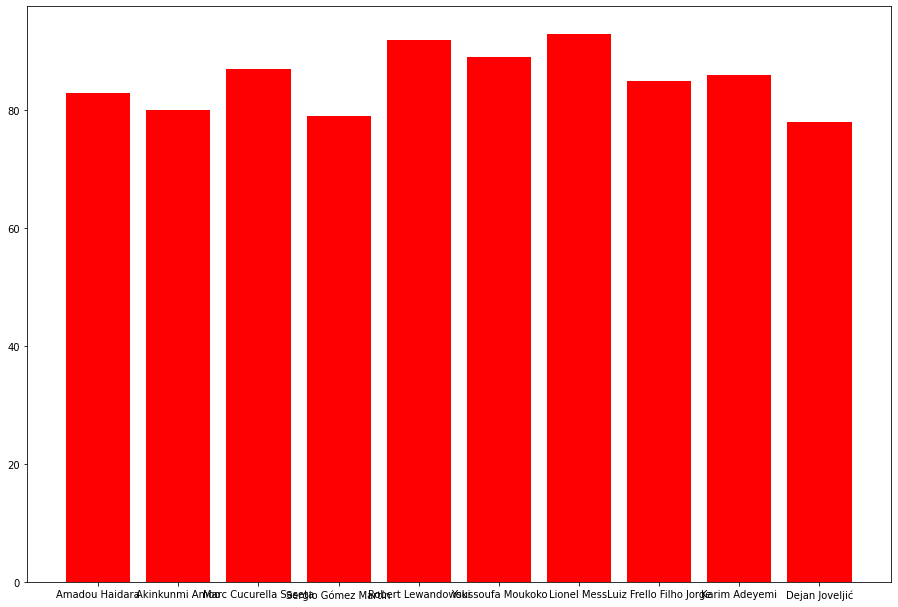

In [ ]:
fig = plt.figure(30)
plt = fig.add_axes([1,1,2,2])
x = fifa_final['Name'].loc[:9] 
y = fifa_final['POT'].loc[:9]

plt.bar(x,y,color='r')
# plt.xlabel('Player Name')
# plt.ylabel('Potential')

In [ ]:
import matplotlib.pyplot as plt

<BarContainer object of 10 artists>

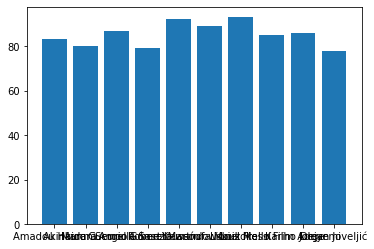

In [ ]:
a=fifa_final.head(10)
X=a["Name"]
Y=a["POT"]
plt.bar(X,Y)

<BarContainer object of 10 artists>

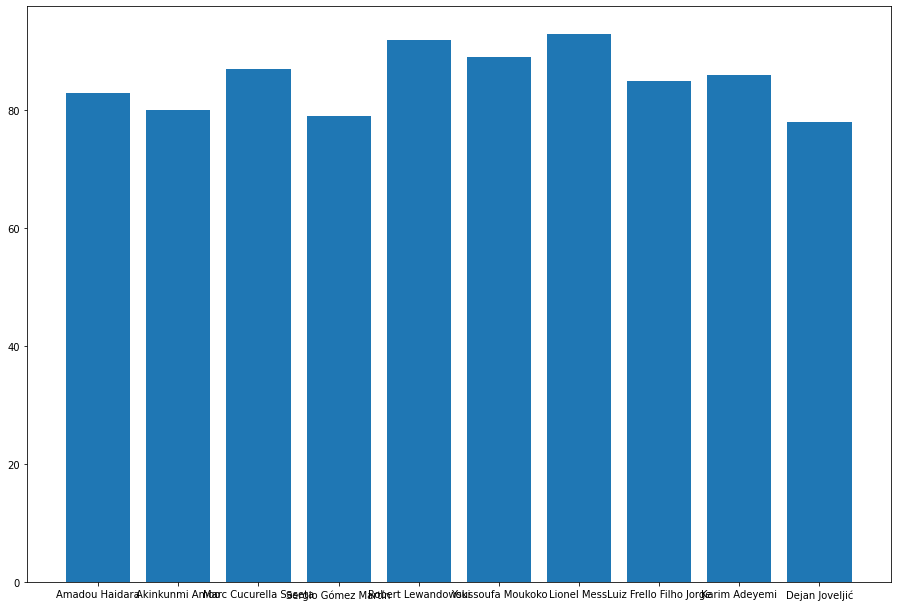

In [ ]:
fig = plt.figure(20)
plt = fig.add_axes([1,1,2,2])
a=fifa_final.head(10)
X=a["Name"]
Y=a["POT"]
plt.bar(X,Y)

6. Plot a graph - First 10 Player's Name V/s Player's Wage

Text(0, 0.5, 'Wage')

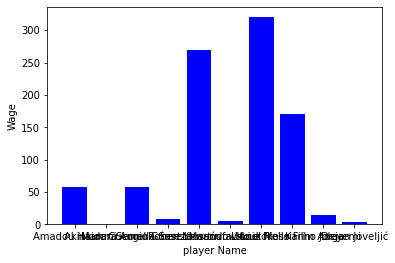

In [ ]:
x = fifa_final['Name'].loc[:9]
y = fifa_final['Wage'].loc[:9]
plt.bar(x,y,color='b')
plt.xlabel('player Name') 
plt.ylabel('Wage')

7. Find the Player(s) whose Potential is more than 90

In [ ]:
fifa_final.loc[fifa_final['POT'] > 90,['Name','POT']]

,Name,POT
4,Robert Lewandowski,92
6,Lionel Messi,93
10,Pedro González López,91
21,C. Ronaldo dos Santos Aveiro,91
42,Kylian Mbappé,95
65,Phil Foden,92
77,Neymar da Silva Santos Jr.,91
82,Erling Haaland,94
84,João Félix Sequeira,91
95,Frenkie de Jong,92


8. Find the Player(s) whose Potential is more than 90 but age < 20

In [ ]:
fifa_final.loc[fifa_final['POT']>90][fifa_final['Age']<20][['Name','Age', 'POT']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Name,Age,POT
10,Pedro González López,18,91


In [ ]:
fifa_final.loc[(fifa_final['POT']>90) & (fifa_final['Age']<20),['Name','Age']]

,Name,Age
10,Pedro González López,18


9. Find the Player(s) whose Value > 10 but Wages < 50

In [ ]:
fifa_final.loc[(fifa_final['Value']>10) & (fifa_final['Wage']<50),['Name','Value','Wage']]

,Name,Value,Wage
12,Julián Álvarez,17.0,14
13,Gonçalo Bernardo Inácio,21.0,7
15,Jude Bellingham,44.5,22
18,Joško Gvardiol,15.0,28
19,Arthur Mendonça Cabral,23.5,16
...,...,...,...
570,Sofiane Diop,21.5,35
571,Silas Katompa Mvumpa,12.5,22
572,Boulaye Dia,21.5,32
577,Daniel Santos Bragança,12.5,11


10. 

In [ ]:
fifa_final.head(3)

,Name,Age,OVA,POT,Team,Value,Wage,Total_stats
0,Amadou Haidara,23,78,83,RB Leipzig,21.0,58,2056
1,Akinkunmi Amoo,19,65,80,Hammarby IF,1.7,1,1598
2,Marc Cucurella Saseta,22,81,87,Brighton & Hove Albion,38.5,57,2101


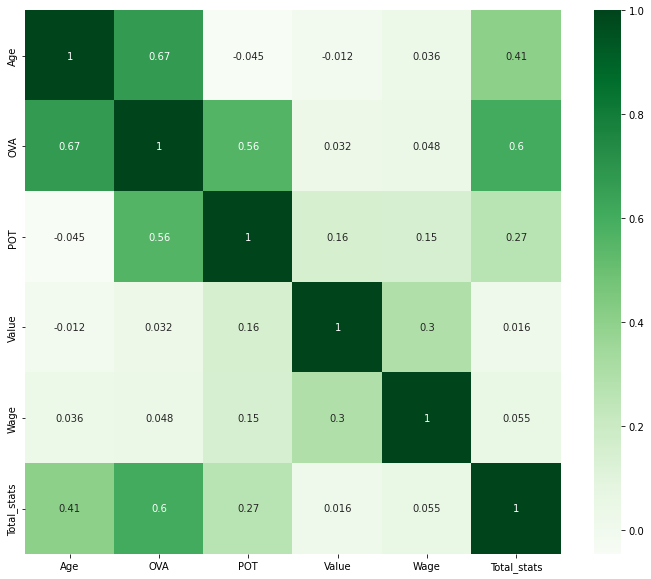

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(fifa_final.corr(), annot=True, cmap='Greens')

In [ ]:
fifa_final.corr()

,Age,OVA,POT,Value,Wage,Total_stats
Age,1.000000,0.669402,-0.045331,-0.012452,0.035811,0.406018
OVA,0.669402,1.000000,0.562090,0.031845,0.047713,0.604923
POT,-0.045331,0.562090,1.000000,0.157706,0.148144,0.268867
Value,-0.012452,0.031845,0.157706,1.000000,0.295510,0.016328
Wage,0.035811,0.047713,0.148144,0.295510,1.000000,0.054568
Total_stats,0.406018,0.604923,0.268867,0.016328,0.054568,1.000000
